# EDA (Exploratory Data Analysis)

Lets see what kind of data we got from youtube transcript.

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords


In [2]:
# Load the JSON file
file_path = '/Users/mjg/Desktop/EY Interview Chatbot/data/transcript/transcript_with_speakers-11.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON to DataFrame
df = pd.DataFrame(data)

# Display the first few rows to verify the structure
print(df.head(10))

   start    end                                               text     speaker
0    0.0    6.0                Wsprawiedź w grzegorzpie Tresjinsky     Unknown
1    8.0   70.0   To może ja zacznę. Grzegorz Piotryszyński pra...  SPEAKER_03
2   70.0  130.0   Magda Stachura. Specjalista dosprachlin w pre...  SPEAKER_02
3  130.0  160.0   Jak to jest to, co sobie które się zapisały n...  SPEAKER_04
4  160.0  238.0   do Hbasid Polska? Ja jestem General Managerem...  SPEAKER_01
5  238.0  455.0   W Rześniu wyszedł taki raport, który co roku ...  SPEAKER_04
6  455.0  509.0   Przede wszystkim, tak, on jest zaangażowanie,...  SPEAKER_02
7  509.0  513.0            Jasne, tak.  Ok, dobra, pani Grzegorzu.  SPEAKER_04
8  513.0  698.0   Ja przede wszystkim na początek chciałbym zwr...  SPEAKER_01
9  698.0  705.0   I nie była ta ustawka. I jakby to jest dla mn...  SPEAKER_04


In [3]:
# Remove all records where the speaker is 'Unknown' or NaN
df = df[df['speaker'].notna() & (df['speaker'] != 'Unknown')]

In [4]:
# Define the mapping of speaker codes to names
speaker_mapping = {
    'SPEAKER_01': 'Grzegorz Rutkowski',
    'SPEAKER_02': 'Magda Stachura',
    'SPEAKER_03': 'Grzegorz Pietrusiński',
    'SPEAKER_04': 'Bartosz Rusek'
}

# Map the speaker codes to the actual names
df['speaker'] = df['speaker'].map(speaker_mapping)

In [5]:
# Define a simplified text standardization function
def standardize_text(text):
    # Step 1: Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Step 2: Consistent capitalization (capitalize first letter)
    text = text.lower()
    
    # Step 3: Remove repetitive punctuation and artifacts
    text = re.sub(r'(\.{2,}|!{2,}|\?{2,})', '.', text)
    
    # Step 4: Remove common Polish filler words or artifacts
    filler_words = [
        'eee', 'yyy', 'aha'
    ]
    pattern = r'\b(?:' + '|'.join(filler_words) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # Clean up any double spaces created after removing filler words
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [6]:
# Apply the function to the DataFrame's text column
df['cleaned_text'] = df['text'].apply(standardize_text)


# Display the cleaned DataFrame to check results
df[['start', 'end', 'speaker', 'cleaned_text']].head()

,start,end,speaker,cleaned_text
1,8.0,70.0,Grzegorz Piotrusiyński,to może ja zacznę. grzegorz piotryszyński prac...
2,70.0,130.0,Magda Stachura,magda stachura. specjalista dosprachlin w prez...
3,130.0,160.0,Bartosz Rusek,"jak to jest to, co sobie które się zapisały na..."
4,160.0,238.0,Grzegorz Rutkowski,do hbasid polska? ja jestem general managerem ...
5,238.0,455.0,Bartosz Rusek,"w rześniu wyszedł taki raport, który co roku w..."


## Speaker Analysis

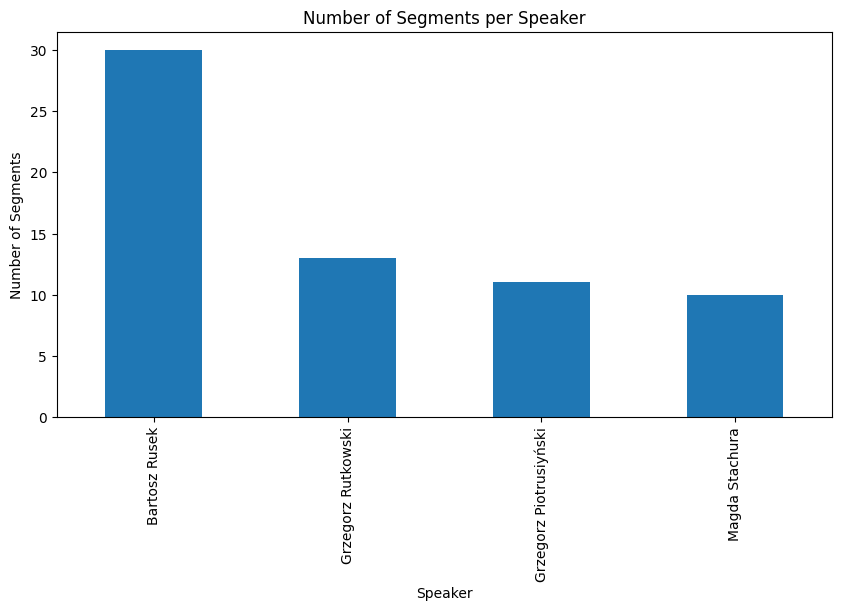

In [7]:
speaker_counts = df['speaker'].value_counts()
speaker_durations = df.groupby('speaker')['end'].sum() - df.groupby('speaker')['start'].sum()

# Plotting speaker segment counts
plt.figure(figsize=(10, 5))
speaker_counts.plot(kind='bar')
plt.title('Number of Segments per Speaker')
plt.xlabel('Speaker')
plt.ylabel('Number of Segments')
plt.show()



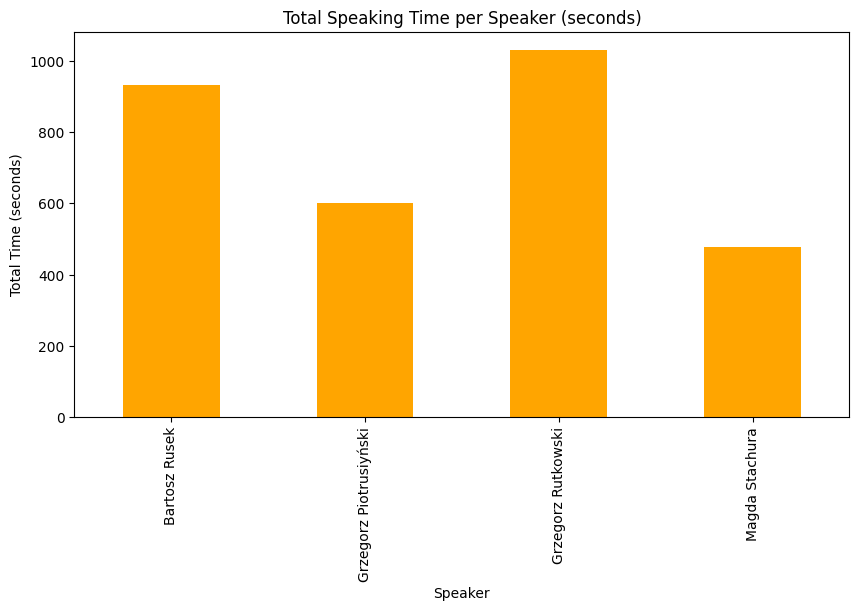

In [8]:
# Plotting speaker total speaking time
plt.figure(figsize=(10, 5))
speaker_durations.plot(kind='bar', color='orange')
plt.title('Total Speaking Time per Speaker (seconds)')
plt.xlabel('Speaker')
plt.ylabel('Total Time (seconds)')
plt.show()

## Speech Length Analysis

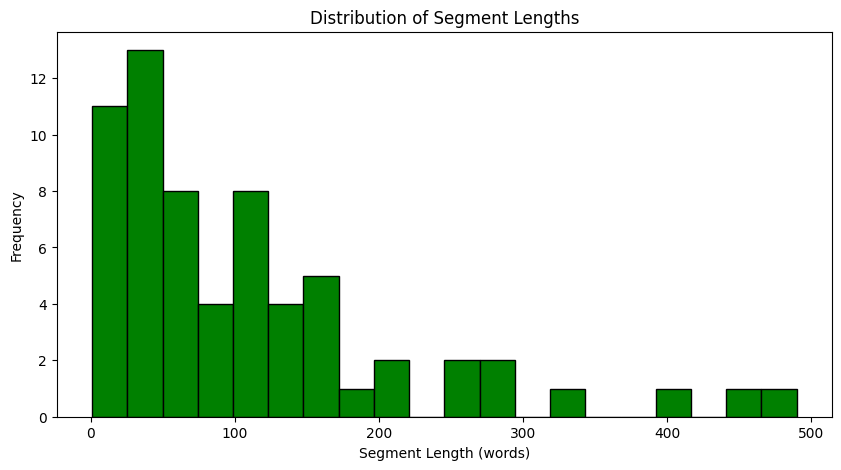

In [9]:
df['segment_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(df['segment_length'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Segment Lengths')
plt.xlabel('Segment Length (words)')
plt.ylabel('Frequency')
plt.show()

## Word Frequency Analysis

In [10]:
# Convert cleaned text into a single string and split into words
all_words = ' '.join(df['cleaned_text']).lower().split()
stop_words = {'i', 'to', 'na', 'w', 'że', 'z', 'o', 'jest', 'tak', 'po', 'a', 'się', 'nie', 'jak', 'też', 'do', 'za', 'to,', 'co', 'on', 'czy', 'ale', 'ja', 'bo', 'ten', 'żeby', 'no', 'tego', 'tam', 'są', 'tym', 'te', 'trochę', 'my', 'mamy', 'jakby', 'tak,', 'że,', 'tą', 'czyli', 'natomiast', 'tej', 'ma', 'tak?', 'od', 'więc', 'coś', 'która', 'właśnie', 'takie', 'taki', 'ok,', 'które', 'który', 'tutaj', 'oczywiście', 'tylko', 'potem', 'może', 'gdzie', 'już', 'dla', 'jeżeli', 'jeszcze', 'była', 'ze', 'jesteśmy', 'być', 'jako', 'bardzo', 'zawsze', 'tego,', 'takim', 'u', 'tych', 'jeden', 'taka', 'sobie', 'kto', 'można', 'jaki', 'był', 'nie?', 'pan', 'swoje', 'ta', 'jakiś', 'jestem', 'tak.', 'będzie', 'albo', 'przez', 'ona', 'pani', 'mi', 'panie', 'się,', 'było', 'każdy', 'ktoś', 'mnie', 'także', 'nie,', 'no,', 'taką', 'jakieś', 'czym', 'musi', 'powiedział,', 'rzeczywiście', 'tu', 'mam', 'takiego'}  
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)

# Ensure most_common_words is defined
most_common_words = word_counts.most_common(15)

# Format the top 10 words as a list for easy copying
formatted_words = ', '.join([f"'{word}'" for word, count in most_common_words])
print(formatted_words)

'odpowiedzialność', 'odpowiedzialności,', 'sposób', 'odpowiedzialności', 'myślę,', 'pracy,', 'pracownicy', 'wynik', 'cel', 'odpowiedzialność.', 'brać', 'moja', 'wiem,', 'znaczy', 'też,'


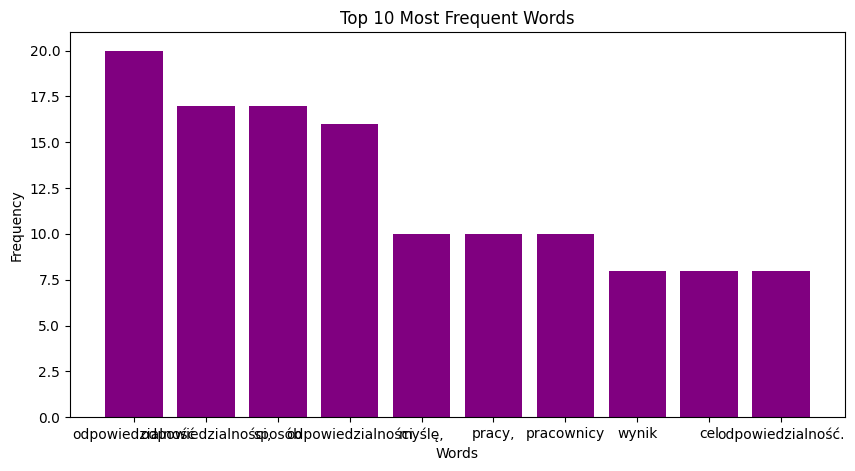

In [11]:
# Plot most common words
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='purple')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Save df into JSON

In [14]:
# Define your output path here
output_path = "/Users/mjg/Desktop/EY Interview Chatbot/data/transcript/transcript_processed.json"

# Convert DataFrame to a JSON-compatible format
data_for_json = df.to_dict(orient="records")

# Save the converted data to JSON with UTF-8 encoding
with open(output_path, "w", encoding="utf-8") as json_file:
    json.dump(data_for_json, json_file, indent=4, ensure_ascii=False)

print(f"Data saved to {output_path}")

Data saved to /Users/mjg/Desktop/EY Interview Chatbot/data/transcript/transcript_processed.json
